# Part 1 Data Collection

## ChEMBL Database

### Installing libraries

In [5]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

## Search for Target Protein

### Target search for Epidermal growth factor receptor

In [6]:
target = new_client.target
target_query = target.search('EGFR')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Mus musculus,Epidermal growth factor receptor erbB1,16.0,False,CHEMBL3608,"[{'accession': 'Q01279', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Homo sapiens,EGFR/PPP1CA,16.0,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,VHL/EGFR,16.0,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,[],Homo sapiens,CCN2-EGFR,16.0,False,CHEMBL5465557,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
4,[],Homo sapiens,Epidermal growth factor receptor erbB1,12.0,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
5,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,12.0,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
6,[],Homo sapiens,Epidermal growth factor receptor,11.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,10.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
8,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,10.0,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
9,[],Homo sapiens,ErbB-2/ErbB-3 heterodimer,10.0,False,CHEMBL4630723,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN COMPLEX,9606


### Retrieve bioactivity data for Epidermal Growth Factor receptor 

In [7]:
selected_target = targets.target_chembl_id[4]
selected_target

'CHEMBL203'

Now we will retrieve bioactivity data

In [8]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')

In [13]:
df = pd.DataFrame.from_dict(res)

In [10]:
df = pd.read_csv('bioactivity_data.csv')

In [11]:
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.041
1,NaN,NaN,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.300
2,NaN,NaN,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,7.820


In [12]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [13]:
df.to_csv('bioactivity_data.csv', index=False)

## Handling missing data

In [14]:
df2 = df[df.standard_value.notna()]
df2

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.041
1,NaN,NaN,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.300
2,NaN,NaN,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,7.820
3,NaN,NaN,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.170
4,NaN,NaN,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18100,NaN,NaN,25785193,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5471956,Selectivity interaction (TR-FRET binding assay...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,10.000
18101,NaN,NaN,25785838,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5472624,Selectivity interaction (Kinase panel (radiome...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,50000.000
18102,NaN,NaN,25786818,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5473647,Selectivity interaction (Kinase panel (Enzymat...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,10.000
18103,NaN,NaN,25787599,"[{'comments': None, 'relation': None, 'result_...",CHEMBL5474412,Selectivity interaction (Kinase panel (33PanQi...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,10.000


## Data pre-processing of bioactivity data

In [16]:
bioactivity_class = []
for i in df2.standard_value:
    if float(i) >= 10000:
        bioactivity_class.append('inactive')
    elif float(i) <= 1000:
        bioactivity_class.append('active')
    else:
        bioactivity_class.append('intermediate')

### Iterate the molecule_chembl_id to list

In [17]:
mol_cid = []
for i in df2.molecule_chembl_id:
    mol_cid.append(i)

### Iterate canonical_smiles to a list

In [19]:
canonical_smiles = []
for i in df2.canonical_smiles:
    canonical_smiles.append(i)

### Iterate standard_value to a list

In [21]:
standard_value = []
for i in df2.standard_value:
    standard_value.append(i)

### Combine the 4 lists into a dataframe

In [22]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame(data_tuples, columns = ['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])

In [23]:
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,41.0
1,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,300.0
2,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,intermediate,7820.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,170.0
4,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,40.0
...,...,...,...,...
16713,CHEMBL3622821,CC[C@@H]1CN(C(=O)NCC(F)(F)F)C[C@@H]1c1cnc2cnc3...,inactive,10000.0
16714,CHEMBL209148,COc1cc(C)c(Sc2cnc(NC(=O)c3ccc(CNC(C)C(C)(C)C)c...,inactive,50000.0
16715,CHEMBL1852688,CCN1CCN(c2ccc(Nc3cc(N(C)C(=O)Nc4c(Cl)c(OC)cc(O...,inactive,10000.0
16716,CHEMBL3643413,CCC(=O)N1CC[C@H](Nc2ncnc3c2CN(c2cnc(OC)c(C(F)(...,inactive,10000.0


In [35]:
from rdkit import Chem

In [31]:
print(df3['canonical_smiles'].head(1).to_string())

0    Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...


In [32]:
smiles_list = df["canonical_smiles"].tolist()
print(smiles_list[1])

Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1


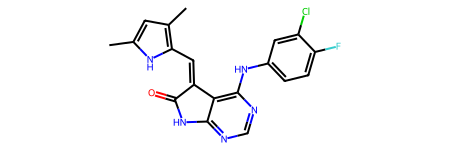

In [36]:
Chem.MolFromSmiles(smiles_list[1])

In [37]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import SimilarityMaps
from reportlab.pdfgen import canvas
from PIL import Image
import io

smiles_list = df3['canonical_smiles'][:50].tolist()

pdf_filename = 'molecules.pdf'
c = canvas.Canvas(pdf_filename)

page_width, page_height = 600, 800
c.setPageSize((page_width, page_height))

x, y = 50, page_height - 150
image_size = 150

for i, smiles in enumerate(smiles_list):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        img = Draw.MolToImage(mol, size = (image_size, image_size))
        img_byte_arr = io.BytesIO()
        img.save(img_byte_arr, format='PNG')

        pil_img = Image.open(img_byte_arr)

        img_path = f'mol_{i}.png'
        pil_img.save(img_path)
        c.drawImage(img_path, x,y, width = image_size, height=image_size)

        x += image_size + 20
        if x > page_width - image_size:
            x = 50
            y -= image_size + 20

        if y < 50:
            c.showPage()
            x, y = 50, page_height - 150
c.save()
print(f'PDF saved as {pdf_filename}')

PDF saved as molecules.pdf
